In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


In [4]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape = x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape = x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min= 0, clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min= 0, clip_value_max=1.)


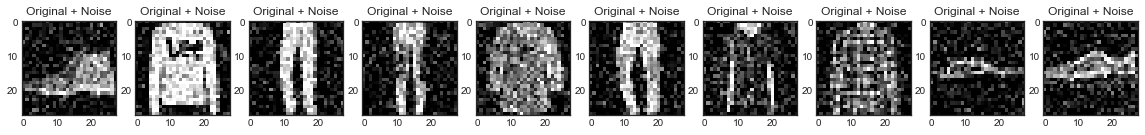

In [5]:
n = 10
plt.figure(figsize = (20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.title('Original + Noise')
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [8]:
# 모델 정의

class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        
        self.encoder = Sequential([Input(shape = (28, 28, 1)),
                                   Conv2D(16,(3, 3), activation= 'relu', padding= 'same', strides = 2),
                                   Conv2D(8,(3, 3), activation= 'relu', padding= 'same', strides = 2)])
        self.decoder = Sequential([Conv2DTranspose(8, kernel_size = 3, strides =2, activation = 'relu', padding = 'same'),
                               Conv2DTranspose(16, kernel_size = 3, strides =2, activation = 'relu', padding = 'same'),
                               Conv2D(1, kernel_size = (3, 3), activation = 'sigmoid', padding='same')])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [11]:
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss = MeanSquaredError())

In [13]:
autoencoder.fit(x_train_noisy, x_train,
                epochs = 10,
                shuffle = True,
                validation_data = (x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 16s 5ms/step - loss: 0.0179 - val_loss: 0.009301
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

In [14]:
autoencoder.encoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [15]:
autoencoder.decoder.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_4 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [16]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


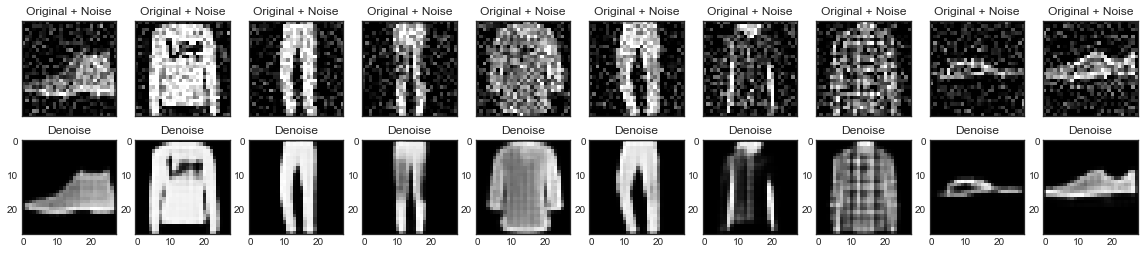

In [19]:
n = 10
plt.figure(figsize = (20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.title('Original + Noise')
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    bx = plt.subplot(2, n, i+1+n)
    plt.title('Denoise')
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()